In [61]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Predict model performance

In [62]:
import pandas as pd
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [63]:
DATA_PATH = 'data/aggregated/experiments.csv'

Data

In [64]:
df = pd.read_csv(DATA_PATH)
df.head(5)

,topology,cells_number,possible_moves,connection_degree,depth,mean_log2_max_tile
0,hex,19,6,4.11,2,11.275
1,hex,19,6,4.11,1,11.105
2,hex,19,6,4.11,4,13.065
3,hex,19,6,4.11,3,13.130
4,hex,19,6,4.11,0,9.120


Model training

In [65]:
features = ['cells_number', 'possible_moves', 'connection_degree', 'depth']
X = df[features].values
y = df['mean_log2_max_tile'].values

In [66]:
model = Ridge(random_state=42)
model.fit(X, y)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


Evaluating

In [67]:
y_pred = model.predict(X)

In [68]:
df['predicted_mean_log2_max_tile'] = y_pred
df_comparison = df[['depth', 'cells_number', 'possible_moves', 'connection_degree', 'mean_log2_max_tile', 'predicted_mean_log2_max_tile']]

Understanding the model

In [69]:
coefs = {}
for feature, coef in zip(features, model.coef_):
    coefs[feature] = coef

intercept = model.intercept_

coefs

{'cells_number': np.float64(0.40173746266628935),
 'possible_moves': np.float64(0.7623526289850459),
 'connection_degree': np.float64(0.33161809311997303),
 'depth': np.float64(0.780967741935484)}

In [70]:
intercept

np.float64(-3.652764418933195)

Comparing predicted performance across different depths











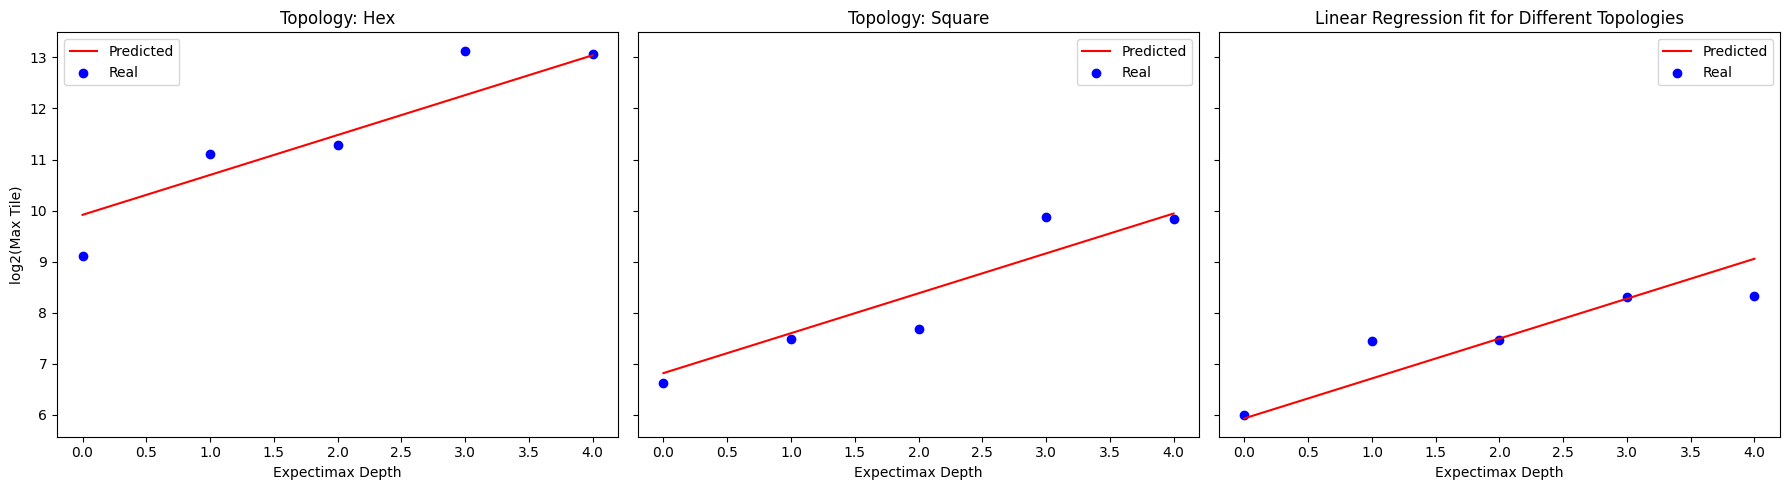

In [71]:
topologies = df["topology"].unique()
n_topos = len(topologies)

fig, axes = plt.subplots(nrows=1, ncols=n_topos, figsize=(6 * n_topos, 5), sharey=True)

if n_topos == 1:
    axes = [axes]

for ax, topo in zip(axes, topologies):
    topo_df = df[df["topology"] == topo].sort_values("depth")
    
    ax.plot(
        topo_df["depth"],
        topo_df["predicted_mean_log2_max_tile"],
        color='red',
        linestyle='-',
        label="Predicted"
    )

    ax.scatter(
        topo_df["depth"],
        topo_df["mean_log2_max_tile"],
        color='blue',
        marker='o',
        label="Real"
    )
    
    ax.set_title(f"Topology: {topo.capitalize()}")
    ax.set_xlabel("Expectimax Depth")
    ax.legend()

axes[0].set_ylabel("log2(Max Tile)")

plt.tight_layout()
plt.title("Linear Regression fit for Different Topologies")
plt.show()